In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.sample(5, random_state=0)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1586,1588,Tom Clancy's Rainbow Six: Vegas,PS3,2007.0,Shooter,Ubisoft,0.47,0.53,0.03,0.22,1.25
5368,5370,Monster Rancher 4,PS2,2003.0,Simulation,Tecmo Koei,0.08,0.06,0.19,0.02,0.34
6275,6277,Dynasty Warriors,PS,1997.0,Action,Tecmo Koei,0.09,0.06,0.11,0.02,0.27
9130,9132,Bravo Air Race,PS,1997.0,Racing,THQ,0.08,0.05,0.00,0.01,0.14
5759,5761,Football Manager 2016,PC,2015.0,Simulation,Sega,0.00,0.29,0.00,0.02,0.31


In [4]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
games = games.dropna()

In [6]:
games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


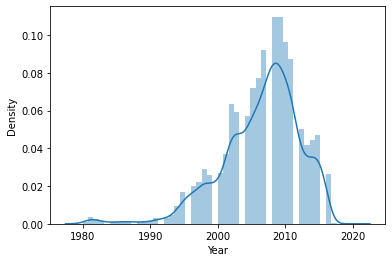

In [7]:
sns.distplot(games.Year)

In [8]:
games.Year.mode()

0    2009.0
dtype: float64

In [10]:
games.Platform.value_counts(normalize=True)*100

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
SCD      0.036830
WS       0.036830
3DO      0.018415
TG16     0.012277
GG       0.006138
PCFX     0.006138
Name: Platform, dtype: float64

In [11]:
games.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Marvelous Games                    1
Quintet                            1
TYO                                1
Number None                        1
PopTop Software                    1
Name: Publisher, Length: 576, dtype: int64

In [15]:
games.query('Publisher == "Nintendo"')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767,2.563836
std,2.989913,1.743953,1.063110,0.464170,5.676925
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.010000,0.007500,0.090000,0.000000,0.300000
50%,0.375000,0.120000,0.280000,0.030000,0.920000
75%,0.972500,0.482500,0.740000,0.090000,2.262500
max,41.490000,29.020000,10.220000,8.460000,82.740000


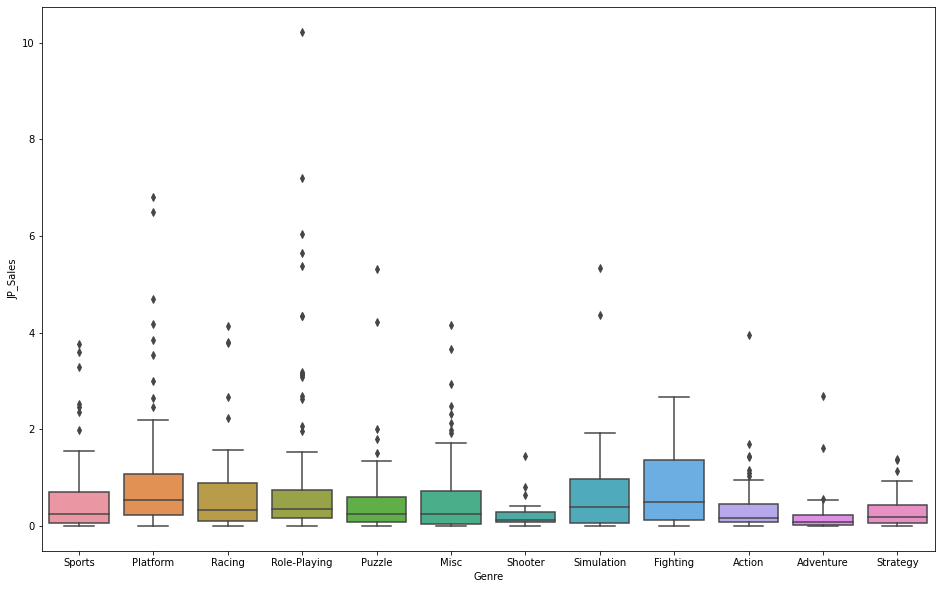

In [27]:
plt.figure(figsize=(16,10))
sns.boxplot(data=games.query('Publisher == "Nintendo"'), x='Genre', y='JP_Sales')

In [23]:
data = games.query('(Publisher == "Nintendo") & (Genre in ("Fighting", "Simulation", "Platform", "Racing", "Sports"))')

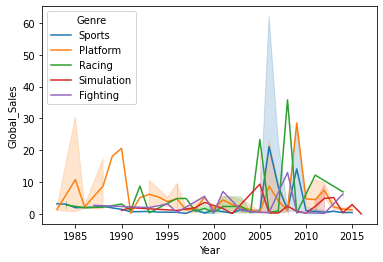

In [25]:

sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data=data)